In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
import os
import glob
import re 
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset
import pandas as pd
import os
import torch
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision
from sklearn.metrics import classification_report
from sklearn import preprocessing
import datetime
import sklearn
import torch.nn.functional as F
import torchvision.transforms.functional as TF

In [65]:

cates_train = glob.glob("drive/MyDrive/sprit_data_fusion/train/*")
print(cates_train)
all_data_train = []

data_train = []
cl_train = []
for cat in cates_train:
  name = glob.glob(cat + "/*")
  print(len(name))
  print(cat)
  for i in range(0, len(name)):
    filename = name[i]
    temp = np.load(filename)
    cl_train.append(temp)
    all_data_train.append(temp)
  data_train.append(cl_train)
  cl_train = []
print(type(np.array(all_data_train)))

cates_test = glob.glob("drive/MyDrive/sprit_data_fusion/validation/*")
print(cates_test)
all_data_test = []

data_test = []
cl_test = []
for cat in cates_test:
  name = glob.glob(cat + "/*")
  print(len(name))
  print(cat)
  for i in range(0, len(name)):
    filename = name[i]
    temp = np.load(filename)
    cl_test.append(temp)
    all_data_test.append(temp)
  data_test.append(cl_test)
  cl_test = []
print(type(np.array(all_data_test)))

['drive/MyDrive/sprit_data_fusion/train/brush_hair', 'drive/MyDrive/sprit_data_fusion/train/smoke', 'drive/MyDrive/sprit_data_fusion/train/run', 'drive/MyDrive/sprit_data_fusion/train/clap']
76
drive/MyDrive/sprit_data_fusion/train/brush_hair
87
drive/MyDrive/sprit_data_fusion/train/smoke
176
drive/MyDrive/sprit_data_fusion/train/run
96
drive/MyDrive/sprit_data_fusion/train/clap
<class 'numpy.ndarray'>
['drive/MyDrive/sprit_data_fusion/validation/clap', 'drive/MyDrive/sprit_data_fusion/validation/run', 'drive/MyDrive/sprit_data_fusion/validation/smoke', 'drive/MyDrive/sprit_data_fusion/validation/brush_hair']
24
drive/MyDrive/sprit_data_fusion/validation/clap
45
drive/MyDrive/sprit_data_fusion/validation/run
22
drive/MyDrive/sprit_data_fusion/validation/smoke
20
drive/MyDrive/sprit_data_fusion/validation/brush_hair
<class 'numpy.ndarray'>


In [66]:
target = {
    "brush_hair" : 0,
    "smoke"      : 1,
    "run"        : 2,
    "clap"       : 3
}

target_train = []
for i in range(len(data_train)):
  for k in range(len(data_train[i])):
    target_train.append(i)

target_test = []
for i in range(len(data_test)):
  for k in range(len(data_test[i])):
    target_test.append(i)
print(all_data_test[0].shape)


(224, 224, 16)


In [67]:
X_train = torch.stack([TF.to_tensor(i) for i in all_data_train])
Y_train = torch.stack([torch.from_numpy(np.array(i)) for i in target_train])
X_test  = torch.stack([TF.to_tensor(i) for i in all_data_test])
Y_test = torch.stack([torch.from_numpy(np.array(i)) for i in target_test])

In [68]:
print(X_train.shape)
print(Y_train)
print(X_test.shape)
print(Y_test)
#nomalized_tensor_gray_image = TF.to_tensor(X_train)

torch.Size([435, 16, 224, 224])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        

In [69]:
train_dataset = torch.utils.data.TensorDataset(X_train, Y_train)
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=16,shuffle=True,num_workers=2)
test_dataset = torch.utils.data.TensorDataset(X_test, Y_test)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=16,shuffle=True,num_workers=2)

In [70]:
class Block(nn.Module):
    def __init__(self, channel_in, channel_out):
        super().__init__()
        channel = channel_out // 4
        # 1x1 の畳み込み
        self.conv1 = nn.Conv2d(channel_in, channel,
                               kernel_size=(1, 1))
        self.bn1 = nn.BatchNorm2d(channel)
        self.relu1 = nn.ReLU()
        # 3x3 の畳み込み
        self.conv2 = nn.Conv2d(channel, channel,
                               kernel_size=(3, 3),
                               padding=1)
        self.bn2 = nn.BatchNorm2d(channel)
        self.relu2 = nn.ReLU()
        # 1x1 の畳み込み
        self.conv3 = nn.Conv2d(channel, channel_out,
                               kernel_size=(1, 1),
                               padding=0)
        self.bn3 = nn.BatchNorm2d(channel_out)
        # skip connection用のチャネル数調整        
        self.shortcut = self._shortcut(channel_in, channel_out)
        
        self.relu3 = nn.ReLU()
    def forward(self, x):
        h = self.conv1(x)
        h = self.bn1(h)
        h = self.relu1(h)
        h = self.conv2(h)
        h = self.bn2(h)
        h = self.relu2(h)
        h = self.conv3(h)
        h = self.bn3(h)
        shortcut = self.shortcut(x)
        y = self.relu3(h + shortcut)  # skip connection
        return y
    def _shortcut(self, channel_in, channel_out):
        if channel_in != channel_out:
            return self._projection(channel_in, channel_out)
        else:
            return lambda x: x
    def _projection(self, channel_in, channel_out):
        return nn.Conv2d(channel_in, channel_out,
                         kernel_size=(1, 1),
                         padding=0)

In [71]:
class ResNet50(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        self.conv1 = nn.Conv2d(16, 64,
                               kernel_size=(7, 7),
                               stride=(2, 2),
                               padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=(3, 3),
                                  stride=(2, 2),
                                  padding=1)
        # Block 1
        self.block0 = self._building_block(256, channel_in=64)
        self.block1 = nn.ModuleList([
            self._building_block(256) for _ in range(2)
        ])
        self.conv2 = nn.Conv2d(256, 512,
                               kernel_size=(1, 1),
                               stride=(2, 2))
        # Block 2
        self.block2 = nn.ModuleList([
            self._building_block(512) for _ in range(4)
        ])
        self.conv3 = nn.Conv2d(512, 1024,
                               kernel_size=(1, 1),
                               stride=(2, 2))
        # Block 3
        self.block3 = nn.ModuleList([
            self._building_block(1024) for _ in range(6)
        ])
        self.conv4 = nn.Conv2d(1024, 2048,
                               kernel_size=(1, 1),
                               stride=(2, 2))
        # Block 4
        self.block4 = nn.ModuleList([
            self._building_block(2048) for _ in range(3)
        ])
        self.avg_pool = GlobalAvgPool2d()  # TODO: GlobalAvgPool2d
        self.fc = nn.Linear(2048, 1000)
        self.out = nn.Linear(1000, output_dim)
    def forward(self, x):
        h = self.conv1(x)
        h = self.bn1(h)
        h = self.relu1(h)
        h = self.pool1(h)
        h = self.block0(h)
        for block in self.block1:
            h = block(h)
        h = self.conv2(h)
        for block in self.block2:
            h = block(h)
        h = self.conv3(h)
        for block in self.block3:
            h = block(h)
        h = self.conv4(h)
        for block in self.block4:
            h = block(h)
        h = self.avg_pool(h)
        h = self.fc(h)
        h = torch.relu(h)
        h = self.out(h)
        y = torch.log_softmax(h, dim=-1)
        return y
    def _building_block(self,
                        channel_out,
                        channel_in=None):
        if channel_in is None:
            channel_in = channel_out
        return Block(channel_in, channel_out)

In [72]:
class GlobalAvgPool2d(nn.Module):
    def __init__(self,
                 device='cpu'):
        super().__init__()
    def forward(self, x):
        return F.avg_pool2d(x, kernel_size=x.size()[2:]).view(-1, x.size(1))

In [73]:
device=torch.device('cuda')
net = model = ResNet50(4).to(device)
net.cuda()

ResNet50(
  (conv1): Conv2d(16, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=1, dilation=1, ceil_mode=False)
  (block0): Block(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU()
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (shortcut): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
    (relu3): ReLU()
  )
  (block1): ModuleList(
    (0): Block(
      (conv1): Conv2d(256, 64, kernel_si

In [74]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [76]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

nb_epoch = 100

for epoch in range(nb_epoch):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0

    #train
    net.train()
    for i, (data, labels) in enumerate(train_loader):
      
      data, labels = data.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = net(data)
      loss = criterion(outputs, labels)
      train_loss += loss.item()
      train_acc += (outputs.max(1)[1] == labels).sum().item()
      loss.backward()
      optimizer.step()

    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)

    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    print ('Epoch [{}/{}], train_loss: {train_loss:.4f}, train_acc: {train_acc:.4f}' 
                   .format(epoch+1, nb_epoch, i+1,  train_loss=avg_train_loss, train_acc=avg_train_acc))
    #val
    net.eval()
    with torch.no_grad():
     for data, labels in test_loader:
      data = data.to(device)
      labels = labels.to(device)
      outputs = net(data)
      loss = criterion(outputs, labels)
      val_loss += loss.item()
      val_acc += (outputs.max(1)[1] == labels).sum().item()
    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_acc / len(test_loader.dataset)

    print ('Epoch [{}/{}], val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}' 
                   .format(epoch+1, nb_epoch, i+1,  val_loss=avg_val_loss, val_acc=avg_val_acc))
    
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)



Epoch [1/100], train_loss: 0.0919, train_acc: 0.3563
Epoch [1/100], val_loss: 0.1293, val_acc: 0.2342
Epoch [2/100], train_loss: 0.0832, train_acc: 0.4253
Epoch [2/100], val_loss: 0.1005, val_acc: 0.1982
Epoch [3/100], train_loss: 0.0833, train_acc: 0.4299
Epoch [3/100], val_loss: 0.0930, val_acc: 0.1712
Epoch [4/100], train_loss: 0.0828, train_acc: 0.4529
Epoch [4/100], val_loss: 0.0920, val_acc: 0.2072
Epoch [5/100], train_loss: 0.0814, train_acc: 0.4391
Epoch [5/100], val_loss: 0.1062, val_acc: 0.2162
Epoch [6/100], train_loss: 0.0806, train_acc: 0.4874
Epoch [6/100], val_loss: 0.1093, val_acc: 0.2523
Epoch [7/100], train_loss: 0.0815, train_acc: 0.4299
Epoch [7/100], val_loss: 0.0936, val_acc: 0.1982
Epoch [8/100], train_loss: 0.0803, train_acc: 0.4299
Epoch [8/100], val_loss: 0.1245, val_acc: 0.1802
Epoch [9/100], train_loss: 0.0789, train_acc: 0.4253
Epoch [9/100], val_loss: 0.1131, val_acc: 0.2252
Epoch [10/100], train_loss: 0.0766, train_acc: 0.4805
Epoch [10/100], val_loss: 0.

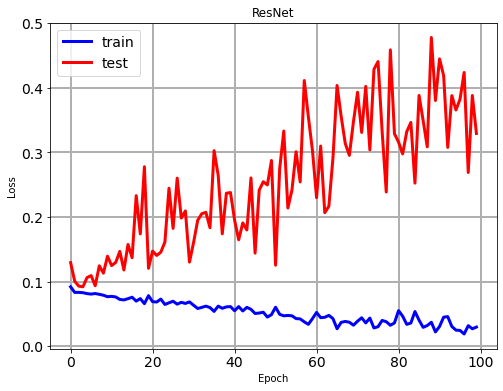

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(train_loss_list,label='train', lw=3, c='b')
plt.plot(val_loss_list,label='test',lw=3,c = 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('ResNet')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()

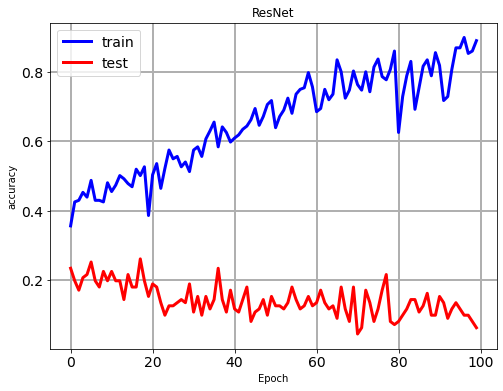

In [78]:
plt.figure(figsize=(8,6))
plt.plot(train_acc_list,label='train', lw=3, c='b')
plt.plot(val_acc_list,label='test',lw=3,c = 'r')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.title('ResNet')
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid(lw=2)
plt.legend(fontsize=14)
plt.show()